# **DIABETES DATA ANALYSIS**

**--->  Descriptive statistics on this dataset**

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from google.colab import drive

In [77]:
import pandas as pd

dataset=pd.read_csv('/content/data-26',sep='\t')

In [78]:
dataset.head()

,Date,Time,code,value
0,07-13-1988,08:00,58,81
1,07-13-1988,08:00,34,26
2,07-13-1988,12:00,60,144
3,07-13-1988,18:00,62,165
4,07-13-1988,22:00,48,196


In [79]:
newdf= (
    dataset.pivot_table(index=dataset.groupby('code').cumcount(),
                   columns='code',
                   values='value')
        .add_prefix('')
        .rename_axis(columns=None)
)

In [80]:
newdf.head()

,33,34,48,58,60,62
0,4.0,26.0,196.0,81.0,144.0,165.0
1,2.0,26.0,251.0,133.0,190.0,242.0
2,6.0,26.0,201.0,140.0,180.0,259.0
3,4.0,26.0,97.0,108.0,175.0,64.0
4,2.0,26.0,235.0,134.0,233.0,314.0


In [81]:
newdf=newdf[:74]

In [82]:
newdf = newdf.rename(columns={'33': 'Regular insulin dose', '34': 'NPH insulin dose',
                        '48':'Unspecified blood glucose measurement','58':'Pre-breakfast blood glucose measurement',
                        '60':'Pre-lunch blood glucose measurement',
                        '62':'Pre-supper blood glucose measurement'})

In [83]:
newdf.head()

,Regular insulin dose,NPH insulin dose,Unspecified blood glucose measurement,Pre-breakfast blood glucose measurement,Pre-lunch blood glucose measurement,Pre-supper blood glucose measurement
0,4.0,26.0,196.0,81.0,144.0,165.0
1,2.0,26.0,251.0,133.0,190.0,242.0
2,6.0,26.0,201.0,140.0,180.0,259.0
3,4.0,26.0,97.0,108.0,175.0,64.0
4,2.0,26.0,235.0,134.0,233.0,314.0


In [84]:
newdf.mean()

Regular insulin dose                         4.810811
NPH insulin dose                            20.027027
Unspecified blood glucose measurement      146.351351
Pre-breakfast blood glucose measurement    127.202703
Pre-lunch blood glucose measurement        128.864865
Pre-supper blood glucose measurement       149.500000
dtype: float64

In [85]:
newdf.median()

Regular insulin dose                         6.0
NPH insulin dose                            22.0
Unspecified blood glucose measurement      133.0
Pre-breakfast blood glucose measurement    130.0
Pre-lunch blood glucose measurement        125.0
Pre-supper blood glucose measurement       132.0
dtype: float64

In [86]:
import statistics
from statistics import StatisticsError
for col in newdf:
  print(col, end="\t")
  try:
    modedata=statistics.mode(newdf[col])
  except StatisticsError:
    print ("No unique mode found")


Regular insulin dose	NPH insulin dose	Unspecified blood glucose measurement	No unique mode found
Pre-breakfast blood glucose measurement	No unique mode found
Pre-lunch blood glucose measurement	No unique mode found
Pre-supper blood glucose measurement	No unique mode found


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


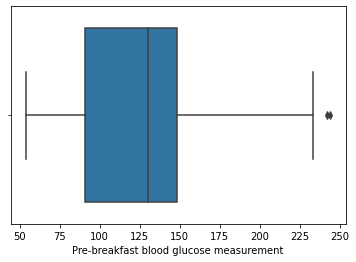

In [87]:
sb.boxplot(newdf['Pre-breakfast blood glucose measurement'])

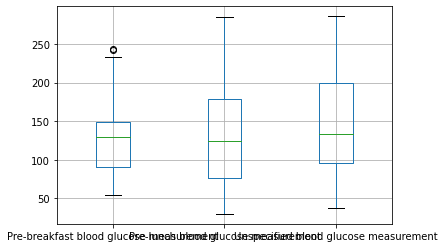

In [88]:
newdf.boxplot(column=['Pre-breakfast blood glucose measurement','Pre-lunch blood glucose measurement','Unspecified blood glucose measurement'])

In [101]:

for col in newdf:
  print(" ")
  data = newdf[col]
  np.sort(data)
  q1, q3= np.percentile(data,[25,75])
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr) 
  upper_bound = q3 + (1.5 * iqr) 
  print('=> ',col)
  print(" ")
  print("Lower bound",lower_bound)
  print("upper ",upper_bound)
  print("Outliers")
  for i in data:
    if i < lower_bound or i > upper_bound:
      
      print("     ",i)

 
=>  Regular insulin dose
 
Lower bound 1.0
upper  9.0
Outliers
 
=>  NPH insulin dose
 
Lower bound 7.0
upper  31.0
Outliers
 
=>  Unspecified blood glucose measurement
 
Lower bound -59.0
upper  355.0
Outliers
 
=>  Pre-breakfast blood glucose measurement
 
Lower bound 4.75
upper  234.75
Outliers
      242.0
      244.0
 
=>  Pre-lunch blood glucose measurement
 
Lower bound -76.875
upper  332.125
Outliers
 
=>  Pre-supper blood glucose measurement
 
Lower bound -38.625
upper  328.375
Outliers


In [92]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Regular insulin dose                     74 non-null     float64
 1   NPH insulin dose                         74 non-null     float64
 2   Unspecified blood glucose measurement    74 non-null     float64
 3   Pre-breakfast blood glucose measurement  74 non-null     float64
 4   Pre-lunch blood glucose measurement      74 non-null     float64
 5   Pre-supper blood glucose measurement     74 non-null     float64
dtypes: float64(6)
memory usage: 4.0 KB


In [93]:
sp=newdf[:74]
sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Regular insulin dose                     74 non-null     float64
 1   NPH insulin dose                         74 non-null     float64
 2   Unspecified blood glucose measurement    74 non-null     float64
 3   Pre-breakfast blood glucose measurement  74 non-null     float64
 4   Pre-lunch blood glucose measurement      74 non-null     float64
 5   Pre-supper blood glucose measurement     74 non-null     float64
dtypes: float64(6)
memory usage: 4.0 KB


**Pairplot in seaborn to plot the relation between pairs of attributes**

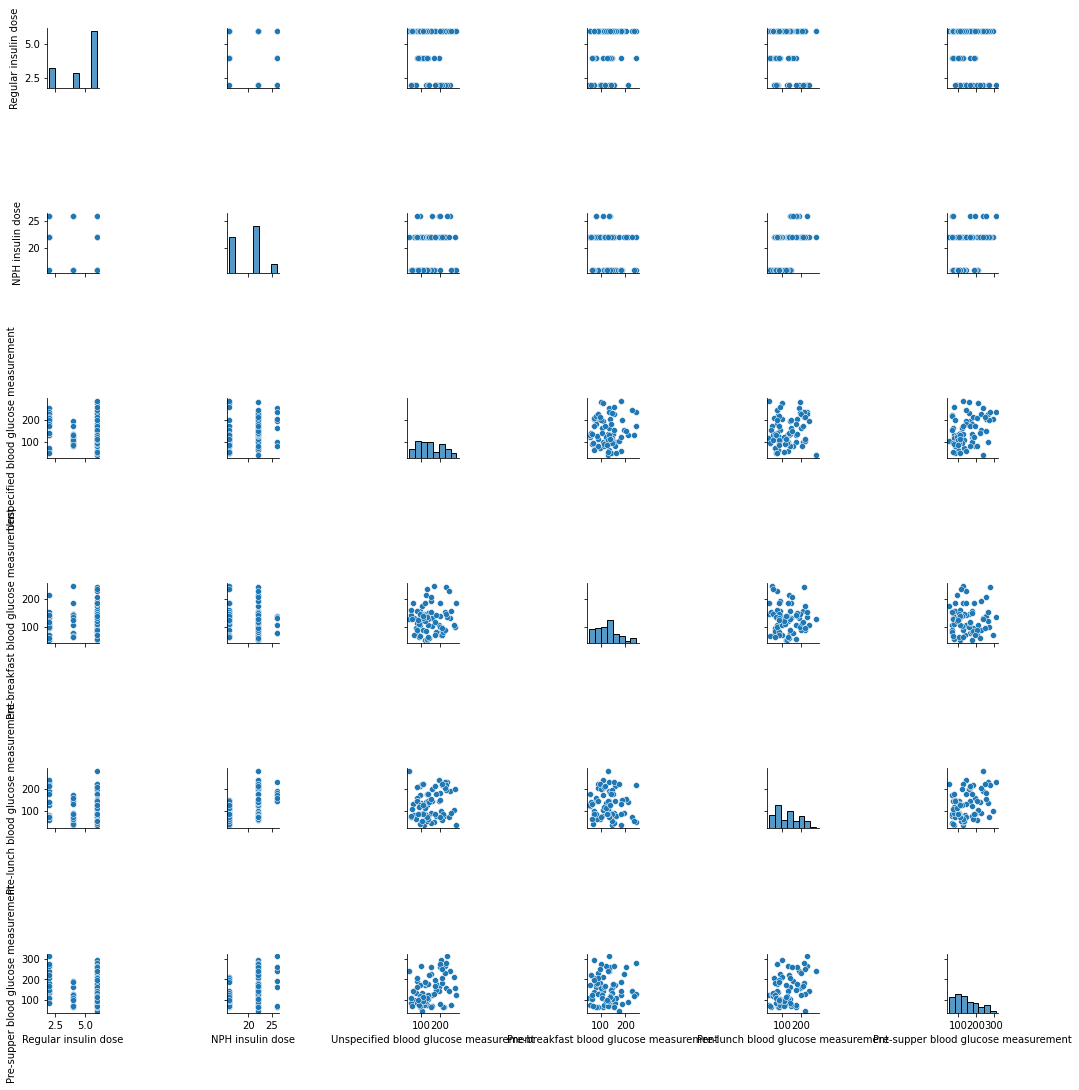

In [94]:
sb.pairplot(sp,kind='scatter')

In [95]:
sp.corr()

,Regular insulin dose,NPH insulin dose,Unspecified blood glucose measurement,Pre-breakfast blood glucose measurement,Pre-lunch blood glucose measurement,Pre-supper blood glucose measurement
Regular insulin dose,1.000000,-0.234688,-0.046592,0.190824,-0.022933,-0.122394
NPH insulin dose,-0.234688,1.000000,0.292873,-0.224276,0.539769,0.431198
Unspecified blood glucose measurement,-0.046592,0.292873,1.000000,0.067276,0.147036,0.363452
Pre-breakfast blood glucose measurement,0.190824,-0.224276,0.067276,1.000000,-0.040093,-0.033227
Pre-lunch blood glucose measurement,-0.022933,0.539769,0.147036,-0.040093,1.000000,0.375736
Pre-supper blood glucose measurement,-0.122394,0.431198,0.363452,-0.033227,0.375736,1.000000


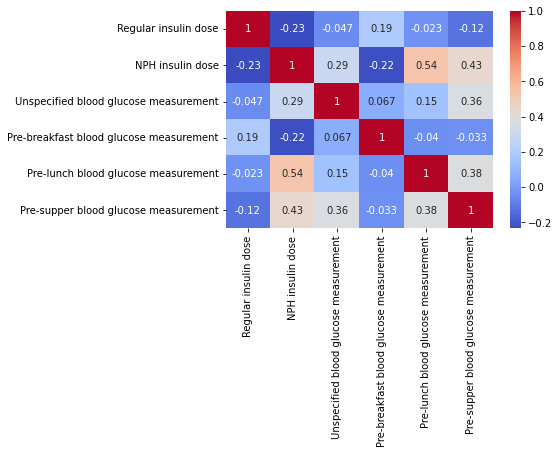

In [96]:
sb.heatmap(sp.corr(), cmap='coolwarm',annot=True)

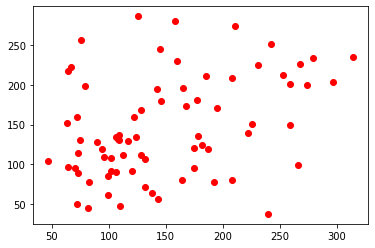

In [97]:
plt.scatter(sp['Pre-supper blood glucose measurement'], sp['Unspecified blood glucose measurement'],color='red')
plt.show()

**From the Correlation of each pair the Unspecified blood glucose measurement and Pre-supper blood glucose measurement	 have  the positive correlation of  0.38.
Lets us  fit a linear regression line for these two attributes. ***

In [98]:

x=sp['Pre-supper blood glucose measurement']
y=sp['Unspecified blood glucose measurement']


In [99]:

n=len(x)
sxy,sx2=0,0
sx,sy=0,0
for i in range(0,n):
  sx+=x[i]
  sy+=y[i]
  m=x[i]*y[i]
  sxy+=m
  sx2+=(x[i]*x[i])
up=(n*sxy)-(sx*sy)
dn=(n*sx2)-(sx*sx)
slope=up/dn
intercept=(sy/n)-(slope*(sx/n))
print(round(slope,3))
print(round(intercept,3))
def fun(x):
  equ=(slope*x)+(intercept)
  return equ
print("Equation : ",round(slope,3) ,"* x +",round(intercept,3))
print(fun(100))




0.341
95.362
Equation :  0.341 * x + 95.362
129.46856290158325


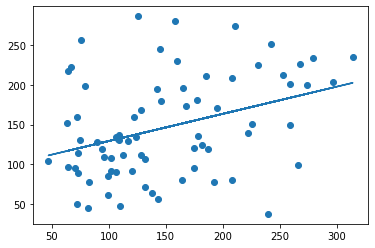

In [100]:
plt.scatter(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.plot(x,mymodel)
plt.show()